# Lazyfit 2D fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lazyfit

# Test case: 2D gaussian

As an example, consider a Gaussian distribution as a function of x and y coordinates.
This is a multivariate distribution with 2 parameters, [https://en.wikipedia.org/wiki/Multivariate_normal_distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution)

In [2]:
# test data parameters
A = 256 # peak amplitude
x0 = 0.5 # peak position in x
y0 = -1 # peak position in y
sx = 1 # standard deviation in x
sy = 0.5 # standard deviation in y
p = 0.2 # linear correlation coeffecient 
B = 50 # constant background

x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 1, 90)
xmat, ymat = np.meshgrid(x, y) # create and x and y mesh
z = np.random.poisson(lam=lazyfit.models2d.gaussian2d.f(xmat, ymat, A, x0, y0, sx, sy, p, B)) # add poisson noise
dz = np.sqrt(z)

In [3]:
z.shape # dimension of data

(90, 100)

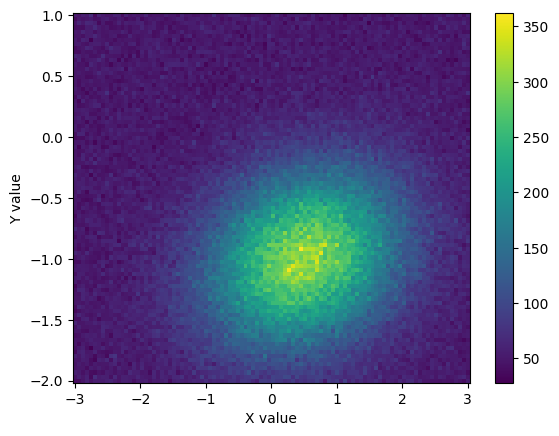

In [4]:
# plot data
plt.pcolormesh(x, y, z, shading='nearest')
plt.xlabel('X value')
plt.ylabel('Y value')
plt.colorbar()

# Fitting

Create a lazyfit Wrapper2d using the same syntax as for 1d, except now we supply a 1d array of x-data, and 1d array  of y-data and a 2d array of z-data (plus optional z errors)

In [5]:
fit = lazyfit.fit2d('gaussian2d', x, y, z, dz) 

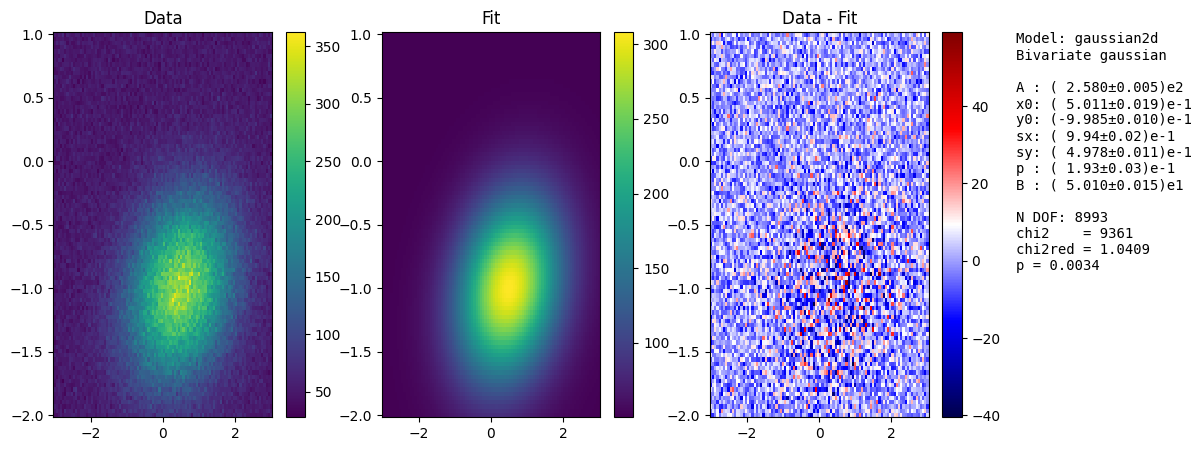

In [6]:
fit.plot();

## Plotting guess

To check if the fitting guess is good, you can plot the guess in an additional panel:

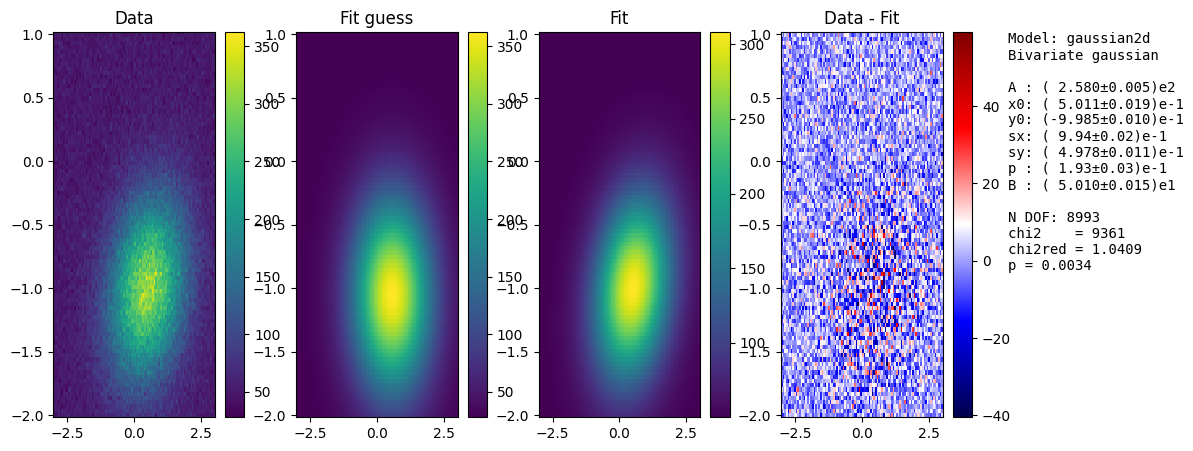

In [7]:
fit.plot(plot_guess=True);

# Retrieving fit parameters 

Exactly the same functionality as 1D

In [8]:
fit.params # get fit parameters in the order they are specified in the fit model

array([ 2.58027341e+02,  5.01080198e-01, -9.98508192e-01,  9.93897738e-01,
        4.97848775e-01,  1.93182712e-01,  5.00968301e+01])

In [9]:
fit.errors # get errors on the fit parameters (this is the square root of the covariance matrix diagonal)

array([0.50301566, 0.00192144, 0.00097096, 0.00220985, 0.0011251 ,
       0.00265638, 0.15334733])

In [10]:
fit.params_dict # get fit paramters as a dictionary

{'A': 258.0273409780645,
 'x0': 0.5010801975723042,
 'y0': -0.998508191500334,
 'sx': 0.9938977379489358,
 'sy': 0.4978487753764962,
 'p': 0.19318271206139517,
 'B': 50.09683008901009}

In [11]:
fit.errors_dict # fit errors as a dictionary

{'A': 0.5030156639690214,
 'x0': 0.0019214409604762883,
 'y0': 0.0009709557737357927,
 'sx': 0.002209848364079241,
 'sy': 0.0011251025701046367,
 'p': 0.002656379426406683,
 'B': 0.15334732553669972}

In [12]:
fit.COVB # covarience matrix

array([[ 2.53024758e-01,  2.92459891e-07,  9.14928434e-06,
        -4.52637582e-04, -2.41146824e-04, -9.00953698e-06,
        -4.72704022e-03],
       [ 2.92459891e-07,  3.69193536e-06,  3.63531957e-07,
        -5.77744560e-10, -2.31179066e-08, -3.11303986e-08,
         2.28872842e-06],
       [ 9.14928434e-06,  3.63531957e-07,  9.42755115e-07,
         3.16606290e-08, -2.57561917e-08, -1.48508486e-08,
        -4.67983350e-06],
       [-4.52637582e-04, -5.77744560e-10,  3.16606290e-08,
         4.88342979e-06,  6.17596455e-07,  6.81636333e-07,
        -1.63684755e-04],
       [-2.41146824e-04, -2.31179066e-08, -2.57561917e-08,
         6.17596455e-07,  1.26585579e-06,  3.57432025e-07,
        -7.77687001e-05],
       [-9.00953698e-06, -3.11303986e-08, -1.48508486e-08,
         6.81636333e-07,  3.57432025e-07,  7.05635166e-06,
         6.37435152e-06],
       [-4.72704022e-03,  2.28872842e-06, -4.67983350e-06,
        -1.63684755e-04, -7.77687001e-05,  6.37435152e-06,
         2.3515402

# Predictions

Evaluate the fit model for 1d arrays of inputs:

In [13]:
fit.predict(np.array([0, 0.5]), np.array([-1,-0.5]))

array([276.28117832, 203.34928806])

Alternatively, you can specify a list of x and y values and evaluate the model for the 2d-array of input values formed by the inputs

In [14]:
fit.predict_mesh(np.array([0, 0.5]), np.array([-1,-0.5]))

array([[276.28117832, 308.12297807],
       [171.48433573, 203.34928806]])

# Inspect fit model

In [15]:
fit.model

<LazyFitModel2d "gaussian2d". Fit parameters: ['A', 'x0', 'y0', 'sx', 'sy', 'p', 'B'].